# **Librerías**

In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
from google.colab import drive
import zipfile
import cv2
import glob
from sklearn.utils import shuffle
from keras.utils import plot_model

# **Cargue y montaje de datos**

In [ ]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
path = "/content/drive/MyDrive/IA/APRENDIZAJE_PROFUNDO/Brain_Tumor_Classification/modelo_1/archive.zip"

In [ ]:
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/dataset_model_1/")
zip_ref.close()


In [ ]:
#path dataset
dataset = "/tmp/dataset_model_1/"
training_folder = "/tmp/dataset_model_1/Training/"
testing_folder = "/tmp/dataset_model_1/Testing/"

In [ ]:
# Función para retornar cantidad de imagenes del dataset y su porcentaje.
def get_dataset_info(dataset_folder):
  subfolders = [f.path for f in os.scandir(dataset_folder) if f.is_dir()]
  total_images = 0
  for subfolder in subfolders:
      image_files = glob.glob(os.path.join(subfolder, '*.jpg'))
      num_images = len(image_files)
      total_images += num_images
      folder_name = os.path.basename(subfolder)
      print(f'{folder_name}: {num_images} imágenes')

  num_images_per_folder = []
  for subfolder in subfolders:
    image_files = glob.glob(os.path.join(subfolder, '*.jpg'))
    num_images = len(image_files)
    num_images_per_folder.append(num_images)
    folder_name = os.path.basename(subfolder)
    percentage = (num_images / total_images) * 100
    print(f'{folder_name}: {percentage:.2f}%')
  percentage_per_folder = [(num_images / total_images) * 100 for num_images in num_images_per_folder]
  tags = [subfolder.split('/')[-1]  for subfolder in subfolders]
  return tags, percentage_per_folder


**Información imagenes en paquete Training**

In [ ]:
subfolders, percentage_per_folder = get_dataset_info(training_folder)

no_tumor: 395 imágenes
glioma_tumor: 826 imágenes
meningioma_tumor: 822 imágenes
pituitary_tumor: 827 imágenes
no_tumor: 13.76%
glioma_tumor: 28.78%
meningioma_tumor: 28.64%
pituitary_tumor: 28.82%


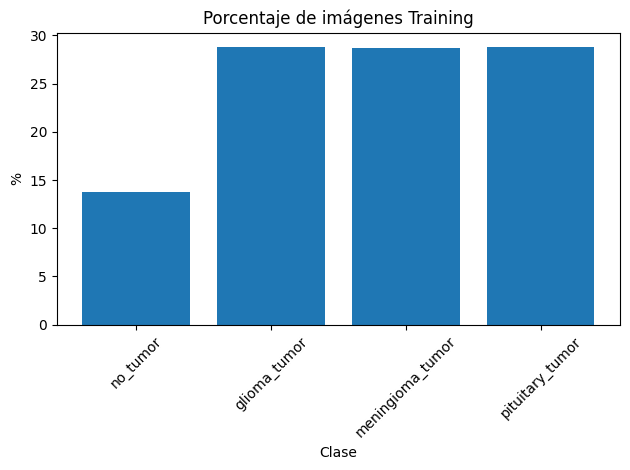

In [ ]:
plt.figure()
plt.bar(subfolders, percentage_per_folder)
plt.xlabel('Clase')
plt.ylabel('%')
plt.title('Porcentaje de imágenes Training')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Información imagenes en paquete Testing**



In [ ]:
subfolders, percentage_per_folder = get_dataset_info(testing_folder)

no_tumor: 105 imágenes
glioma_tumor: 100 imágenes
meningioma_tumor: 115 imágenes
pituitary_tumor: 74 imágenes
no_tumor: 26.65%
glioma_tumor: 25.38%
meningioma_tumor: 29.19%
pituitary_tumor: 18.78%


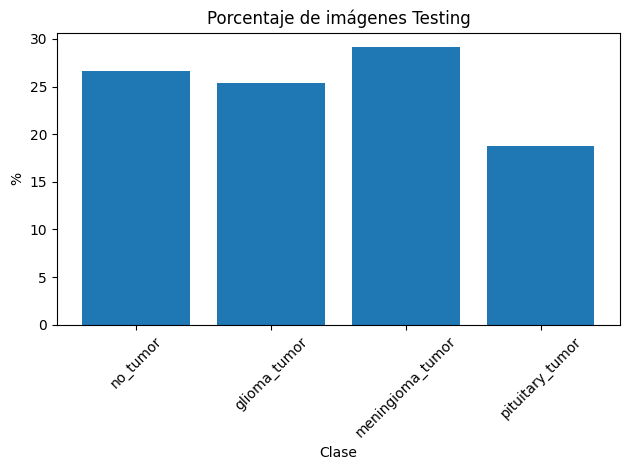

In [ ]:
plt.figure()
plt.bar(subfolders, percentage_per_folder)
plt.xlabel('Clase')
plt.ylabel('%')
plt.title('Porcentaje de imágenes Testing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Explorando características de una imágen**

In [ ]:
imagen = cv2.imread(training_folder + 'glioma_tumor/gg (8).jpg')
alto, ancho, canales = imagen.shape
alto, ancho, canales

(512, 512, 3)

In [ ]:
tipo = imagen.dtype
print('Tipo de datos de la imagen:', tipo)

Tipo de datos de la imagen: uint8


In [ ]:
num_total_pixeles = imagen.size
print('Número total de píxeles en la imagen:', num_total_pixeles)

Número total de píxeles en la imagen: 786432


In [ ]:
valor_min = imagen.min()
valor_max = imagen.max()
print('Rango de valores de píxeles:', valor_min, 'a', valor_max)

Rango de valores de píxeles: 0 a 255


**Clases del dataset**

In [ ]:
classes = os.listdir(training_folder)
tags = list(classes)
tags


['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

In [ ]:
x_training, y_training, x_test, y_test = [], [], [], []

def convert_image_in_dataset(folder_dataset):
  x_set, y_set = [], []
  for index, tag in enumerate(tags):
    class_folder_path = os.path.join(folder_dataset, tag)
    for image_path in os.listdir(class_folder_path): #Listar imagenes
      image = cv2.imread(os.path.join(class_folder_path, image_path))
      image = cv2.resize(image,(150, 150))
      x_training.append(image)
      y_training.append(tag)

In [ ]:
convert_image_in_dataset(training_folder)
convert_image_in_dataset(testing_folder)

In [ ]:
x_training = np.array(x_training)
y_training = np.array(y_training)

In [ ]:
x_training, y_training = shuffle(x_training, y_training, random_state=101)
x_training.shape

(3264, 150, 150, 3)

In [ ]:
y_training


array(['meningioma_tumor', 'pituitary_tumor', 'meningioma_tumor', ...,
       'meningioma_tumor', 'meningioma_tumor', 'glioma_tumor'],
      dtype='<U16')

In [ ]:
from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test = train_test_split(x_training, y_training, test_size=0.1, random_state=101)

In [ ]:
old_y_training = y_training

In [ ]:
old_y_training[0]

'no_tumor'

In [ ]:
def convert_tag_to_number_index(data):
  data_converted = []
  for index in data:
    data_converted.append(tags.index(index))
  return data_converted

In [ ]:
y_training = convert_tag_to_number_index(y_training)
y_test = convert_tag_to_number_index(y_test)

In [ ]:
y_training = tf.keras.utils.to_categorical(y_training)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_test.shape

(327, 4)

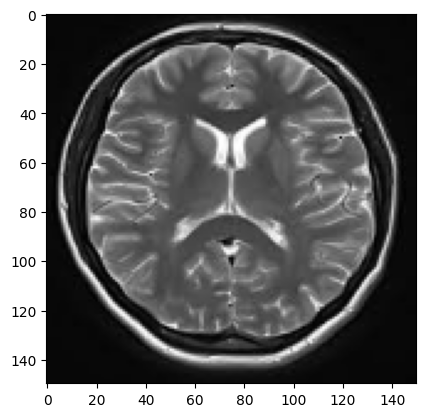

In [ ]:
plt.imshow(x_training[0])

In [ ]:
old_y_training[0]

'no_tumor'

# **Construcción del modelo**

# **Modelo 1, Primera definición**

In [ ]:
#Inicializar el modelo
model1 = Sequential()

In [ ]:
# Primera capa
model1_capa1 = Conv2D(
     32,
    (3,3),
    activation = 'relu',
    input_shape=(150,150,3)
)

In [ ]:
model1_capa2 = Conv2D(
    64,
    (3,3),
    activation = 'relu'
)

In [ ]:
#Capa Max Pooling
model_1_max_pooling_1 = MaxPooling2D((2,2))

In [ ]:
#Capa Dropout
model_1_dropout_1 = Dropout(0.3)

In [ ]:
#Capa Flattening
model_1_flattening = Flatten()

In [ ]:
#Capa oculta 1
model_1_dense_1 = Dense(
    512,
    activation = "relu"
)

In [ ]:
#Capa oculta 2
model_1_dense_2 = Dense(
    512,
    activation = "relu"
)

In [ ]:
# Dropout 2
model_1_dropout_2 = Dropout(0.3)

In [ ]:
#Capa de salida
model_1_dense_3 = Dense(
    4,
    activation = "softmax"
)

In [ ]:
#Se agregan las capas al modelo
model1.add(model1_capa1)
model1.add(model1_capa2)
model1.add(model_1_max_pooling_1)
model1.add(model_1_dropout_1)
model1.add(model_1_flattening)
model1.add(model_1_dense_1)
model1.add(model_1_dense_2)
model1.add(model_1_dropout_2)
model1.add(model_1_dense_3)

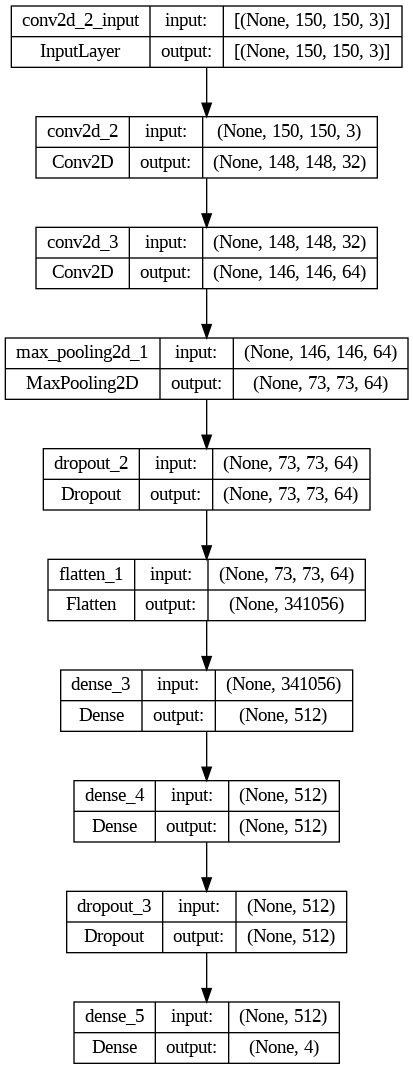

In [ ]:
plot_model(model1, 'net.png', show_shapes=True)

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 341056)            0         
                                                                 
 dense_3 (Dense)             (None, 512)               174621184 
                                                      

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
results = model1.fit(x_training, y_training, epochs=10, validation_split=0.1)

Epoch 1/10
83/83 [==============================] - 7s 89ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 1.3637 - val_accuracy: 0.8673
Epoch 2/10
83/83 [==============================] - 7s 85ms/step - loss: 0.0845 - accuracy: 0.9769 - val_loss: 0.6805 - val_accuracy: 0.8776
Epoch 3/10
83/83 [==============================] - 7s 86ms/step - loss: 0.0606 - accuracy: 0.9841 - val_loss: 0.9664 - val_accuracy: 0.8776
Epoch 4/10
83/83 [==============================] - 7s 87ms/step - loss: 0.1418 - accuracy: 0.9659 - val_loss: 1.0607 - val_accuracy: 0.8605
Epoch 5/10
83/83 [==============================] - 7s 88ms/step - loss: 0.1331 - accuracy: 0.9769 - val_loss: 0.9402 - val_accuracy: 0.8844
Epoch 6/10
83/83 [==============================] - 7s 86ms/step - loss: 0.0611 - accuracy: 0.9852 - val_loss: 0.8683 - val_accuracy: 0.8946
Epoch 7/10
83/83 [==============================] - 7s 87ms/step - loss: 0.0537 - accuracy: 0.9849 - val_loss: 0.9372 - val_accuracy: 0.8844
Epoch 8/10
83

**Evaluación de desempeño modelo 1**

In [ ]:
model1.evaluate(x_test, y_test)
scores = model1.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 17ms/step - loss: 0.7968 - accuracy: 0.8624

accuracy: 86.24%


Modelo 1 - Grafica de desempeño Accuracy



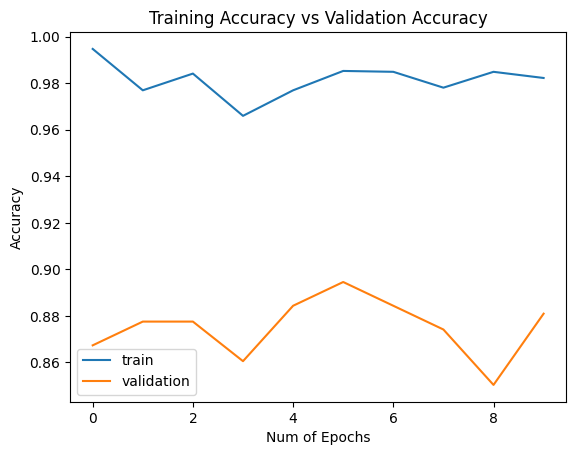

In [ ]:
plt.figure(0)
plt.plot(results.history['accuracy'], label='training accuracy')  
plt.plot(results.history['val_accuracy'], label='val accuracy')
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

Modelo 1 - Grafica de función de perdida Loss

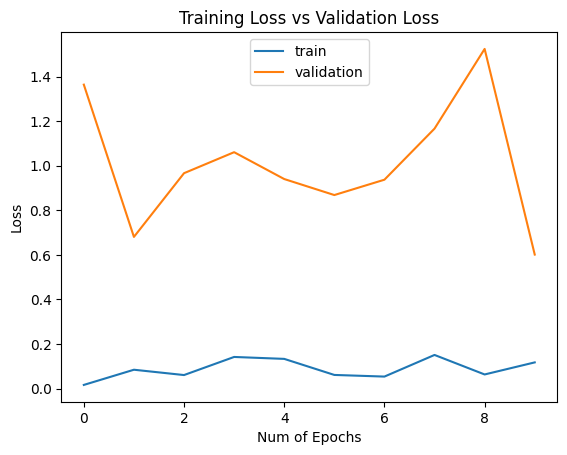

In [ ]:
plt.figure(1)
plt.plot(results.history['loss'], label='training loss')  
plt.plot(results.history['val_loss'], label='val loss')
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

# **Modelo 3 combinación de arquitectura, ajustes y más capas**

In [ ]:
# Inicializar la CNN
model = Sequential()

In [ ]:
#Capa 1: Convolution
capa1 = Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
    input_shape=(150,150,3)
)

In [ ]:
#Capa 2: Convolution
capa2 = Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu'
)

In [ ]:
#Capa 1: Max Pooling
max_pooling_1 = MaxPooling2D(pool_size = (2,2))

In [ ]:
#Capa Dropout 1
dropout_1 = Dropout(0.3)

In [ ]:
#Capa 3 -> Convolution
capa3 = Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    activation = "relu",
    strides=1,
)

In [ ]:
capa4 = Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    activation = "relu",
    strides=1,
)

In [ ]:
#Capa Dropout 2
dropout_2 = Dropout(0.3)

In [ ]:
#Capa 2: Max Pooling
max_pooling_2 = MaxPooling2D(pool_size = (2,2))

In [ ]:
#Capa Dropout 3
dropout_3 = Dropout(0.3)

In [ ]:
capa5 = Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    activation = "relu",
    strides=1,
)

In [ ]:
capa6 = Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    activation = "relu",
    strides=1,
)

In [ ]:
capa7 = Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    activation = "relu",
    strides=1,
)

In [ ]:
#Capa 3: Max Pooling
max_pooling_3 = MaxPooling2D(pool_size = (2,2))

In [ ]:
#Capa Dropout 4
dropout_4 = Dropout(0.3)

In [ ]:
capa8 = Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    activation = "relu",
    strides=1,
)

In [ ]:
capa9 = Conv2D(
    filters = 256,
    kernel_size = (3, 3),
    activation = "relu",
    strides=1,
)

In [ ]:
#Capa 4: Max Pooling
max_pooling_4 = MaxPooling2D(pool_size = (2,2))

In [ ]:
#Capa Dropout 5
dropout_5 = Dropout(0.3)

In [ ]:
flattening = Flatten()

In [ ]:
capa10 = Dense(
    512,
    activation = "relu"
)

In [ ]:
capa11 = Dense(
    512,
    activation = "relu"
)

In [ ]:
#Capa Dropout 6
dropout_6 = Dropout(0.3)

In [ ]:
capa12 = Dense(
    4,
    activation = "softmax",
)

In [ ]:
model.add(capa1)
model.add(capa2)
model.add(max_pooling_1)
model.add(dropout_1)
model.add(capa3)
model.add(capa4)
model.add(dropout_2)
model.add(max_pooling_2)
model.add(dropout_3)
model.add(capa5)
model.add(capa6)
model.add(capa7)
model.add(max_pooling_3)
model.add(dropout_4)
model.add(capa8)
model.add(capa9)
model.add(max_pooling_4)
model.add(dropout_5)
model.add(flattening)
model.add(capa10)
model.add(capa11)
model.add(dropout_6)
model.add(capa12)

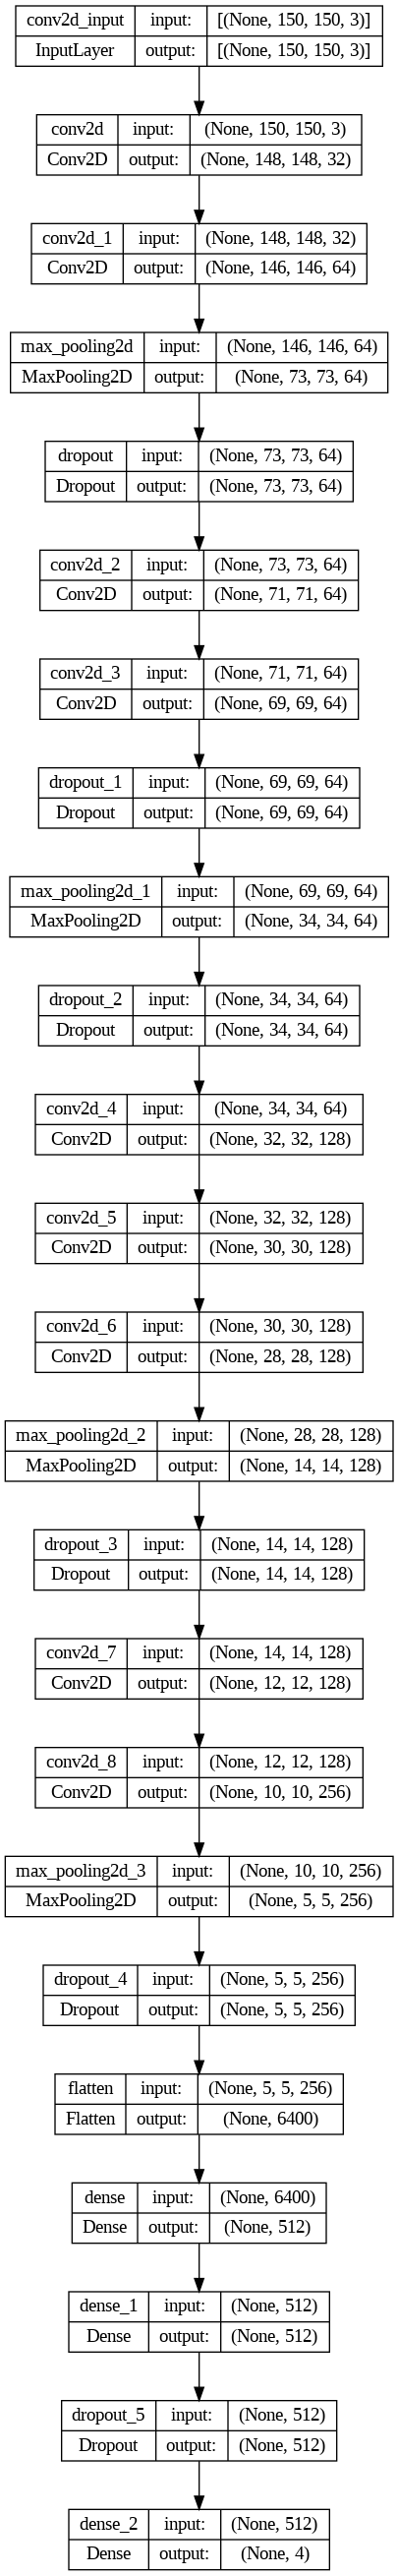

In [ ]:
plot_model(model, 'net.png', show_shapes=True)

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
results = model.fit(x_training, y_training, epochs=20, validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 28s 124ms/step - loss: 1.7157 - accuracy: 0.2868 - val_loss: 1.3482 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 8s 96ms/step - loss: 1.1492 - accuracy: 0.4862 - val_loss: 1.0429 - val_accuracy: 0.5238
Epoch 3/20
83/83 [==============================] - 8s 96ms/step - loss: 0.9324 - accuracy: 0.5846 - val_loss: 0.9160 - val_accuracy: 0.6122
Epoch 4/20
83/83 [==============================] - 8s 96ms/step - loss: 0.8164 - accuracy: 0.6413 - val_loss: 0.7495 - val_accuracy: 0.6803
Epoch 5/20
83/83 [==============================] - 8s 98ms/step - loss: 0.7019 - accuracy: 0.7030 - val_loss: 0.8179 - val_accuracy: 0.6361
Epoch 6/20
83/83 [==============================] - 8s 96ms/step - loss: 0.6661 - accuracy: 0.7212 - val_loss: 0.6690 - val_accuracy: 0.7347
Epoch 7/20
83/83 [==============================] - 8s 98ms/step - loss: 0.6070 - accuracy: 0.7442 - val_loss: 0.6002 - val_accuracy: 0.7517
Epoch 8/20


In [ ]:
model.evaluate(x_test, y_test)
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 19ms/step - loss: 0.4580 - accuracy: 0.8654

accuracy: 86.54%


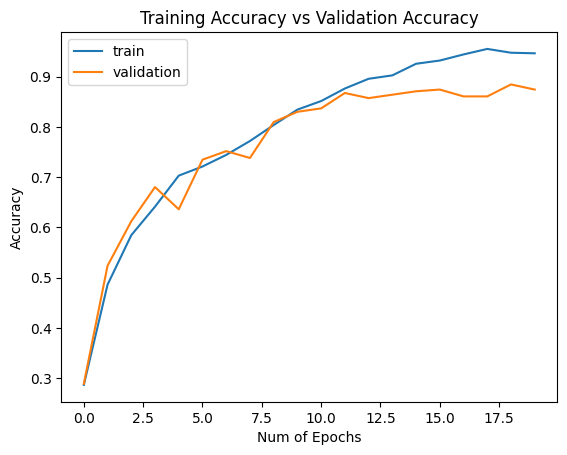

In [ ]:
plt.figure(0)
plt.plot(results.history['accuracy'], label='training accuracy')  
plt.plot(results.history['val_accuracy'], label='val accuracy')
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])


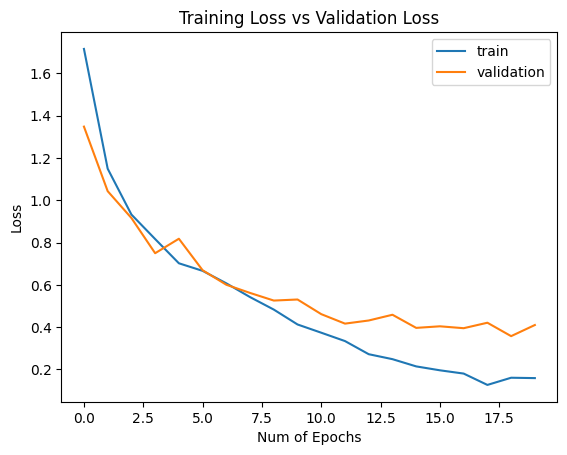

In [ ]:
plt.figure(1)
plt.plot(results.history['loss'], label='training loss')  
plt.plot(results.history['val_loss'], label='val loss')
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])